In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [0]:
import imgaug as ia
from imgaug import augmenters as iaa
ia.seed(4)

In [0]:
x  = np.load('/content/drive/My Drive/Unet_correctness/image_train.npz')
y = np.load('/content/drive/My Drive/Unet_correctness/label_train.npz')
x = x['image_train']
y = y['label_train']

In [0]:
x_256 = iaa.Resize((256,256))(images = (x * 255).astype('uint8'))
y_256 = iaa.Resize((256,256))(images = y)
x_256 = x_256/255

In [0]:
gamma = iaa.GammaContrast(1.25)(images = x_256)
log = iaa.LogContrast(0.9)(images = x_256)
sigmoid = iaa.SigmoidContrast(4)(images = x_256)
big_x = np.vstack([x_256,gamma,log,sigmoid])
big_y = np.vstack([y_256,  y_256   , y_256     ,y_256])


In [0]:
x_train, x_test, y_train, y_test = train_test_split(big_x, big_y, test_size = 0.2, random_state = 103)

In [0]:
x_train = np.reshape(x_train,(307,256,256,1))
x_test = np.reshape(x_test,(77,256,256,1))
y_train = np.reshape(y_train,(307,256,256,1))
y_test = np.reshape(y_test,(77,256,256,1))

In [10]:
from keras.layers import Conv2D,Dropout,BatchNormalization,Activation,UpSampling2D,MaxPooling2D,Input,concatenate
from keras.optimizers import *
from keras.losses import *
from keras.models import Model

Using TensorFlow backend.


In [0]:
def satellite(input_image):
  
  
  
  conv_1 = Conv2D(filters = 16,kernel_size=(3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(input_img)
  batch_conv1 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_1)
  activate_batch_conv1 = Activation('relu')(batch_conv1)

  conv_2 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer = 'he_normal')(activate_batch_conv1)
  batch_conv2 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_2)
  activate_batch_conv2 = Activation('relu')(batch_conv2)
  
  conv_3 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv2)
  batch_conv3 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_3)
  activate_batch_conv3 = Activation('relu')(batch_conv3)
  
  conv_4 = Conv2D(filters = 128,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv3)
  batch_conv4 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_4)
  activate_batch_conv4 = Activation('relu')(batch_conv4)
  
  conv_5 = Conv2D(filters = 64,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv4)
  batch_conv5 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_5)
  activate_batch_conv5 = Activation('relu')(batch_conv5)
  
  conv_6 = Conv2D(filters = 32,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv5)
  batch_conv6 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_6)
  activate_batch_conv6 = Activation('relu')(batch_conv6)
  
  conv_7 = Conv2D(filters = 16,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv6)
  batch_conv7 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_7)
  activate_batch_conv7 = Activation('relu')(batch_conv7)
  
  conv_8 = Conv2D(filters = 4,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv7)
  batch_conv8 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_8)
  activate_batch_conv8 = Activation('relu')(batch_conv8)
  
  conv_9 = Conv2D(filters = 2,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv8)
  batch_conv9 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_9)
  activate_batch_conv9 = Activation('relu')(batch_conv9)
  
  conv_10 = Conv2D(filters = 1,kernel_size = (3,3),strides = (1,1),padding = 'same',kernel_initializer='he_normal')(activate_batch_conv9)
  batch_conv10 = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(conv_10)
  activate_batch_conv10 = Activation('sigmoid')(batch_conv10)
  
  model = Model(input = [input_img], output =[activate_batch_conv10])
  return model
  

In [21]:
input_img = Input((256,256,1))
model = satellite(input_img)
model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [22]:
model.fit(x_train, y_train, batch_size=4, epochs=100,validation_data=(x_test, y_test))

Train on 307 samples, validate on 77 samples
Epoch 1/100
307/307 [==============================] - 9s 29ms/step - loss: 0.4915 - acc: 0.8343 - val_loss: 0.4545 - val_acc: 0.8686
Epoch 2/100
307/307 [==============================] - 6s 20ms/step - loss: 0.4327 - acc: 0.8684 - val_loss: 0.4391 - val_acc: 0.8614
Epoch 3/100
307/307 [==============================] - 6s 20ms/step - loss: 0.4043 - acc: 0.8791 - val_loss: 0.3959 - val_acc: 0.8844
Epoch 4/100
307/307 [==============================] - 6s 20ms/step - loss: 0.3813 - acc: 0.8859 - val_loss: 0.3725 - val_acc: 0.8901
Epoch 5/100
307/307 [==============================] - 6s 20ms/step - loss: 0.3607 - acc: 0.8917 - val_loss: 0.3524 - val_acc: 0.8905
Epoch 6/100
307/307 [==============================] - 6s 20ms/step - loss: 0.3445 - acc: 0.8945 - val_loss: 0.3365 - val_acc: 0.8936
Epoch 7/100
307/307 [==============================] - 6s 20ms/step - loss: 0.3299 - acc: 0.8971 - val_loss: 0.3299 - val_acc: 0.8899
Epoch 8/100
307/3

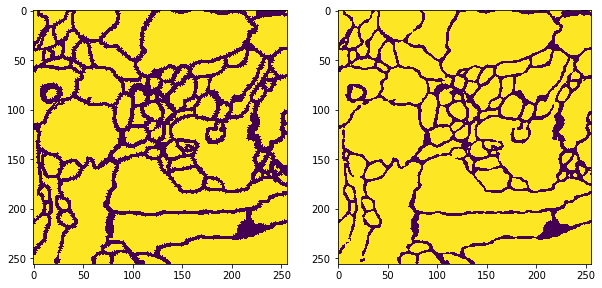

In [23]:
test_x = model.predict(x_test[55].reshape(1,256,256,1))

test_x_thresh = test_x.copy()
test_x_thresh[test_x >= 0.1] = 1
test_x_thresh[test_x < 0.1] = 0

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(y_test[55].reshape(256,256)) #actual
ax[1].imshow(test_x_thresh.reshape(256,256))     #predicted(apply threshold if needed)

In [0]:
def calc_iou(real,pred):
  num = np.logical_and(real,pred)
  den = np.logical_or(real,pred)
  
  return np.sum(num) / np.sum(den)

In [0]:
iou_train = []
for i,j in zip(x_train,y_train):
  
  dummy = model.predict(i.reshape(1,256,256,1))
  img = dummy.copy()
  img[dummy< 0.1] = 0
  img[dummy >= 0.1] = 1
  iou_train.append(calc_iou(j.reshape(256,256),img.reshape(256,256)))

In [0]:
iou_test = []
for i,j in zip(x_test,y_test):
  
  dummy = model.predict(i.reshape(1,256,256,1))
  img = dummy.copy()
  img[dummy< 0.1] = 0
  img[dummy >= 0.1] = 1
  iou_test.append(calc_iou(j.reshape(256,256),img.reshape(256,256)))

In [39]:
print("Mean IOU on training data %f"%(np.mean(np.array(iou_train))))
print("Mean IOU on test data %f"%(np.mean(np.array(iou_test))))

Mean IOU on training data 0.903702
Mean IOU on test data 0.893087
